In [1]:
import numpy as np

import sys # needed to import cat_utils
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/') 

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import imp
import cat_utils
imp.reload(cat_utils)

import cPickle as pickle

from astropy.io import fits

In [6]:
mwa_img,mwa_img_counts = pickle.load(open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/mwa_and_ir_catalogs_xcor2/mwa_img_with_counts.p",'rb'))

In [2]:
dtheta_deg = 2./60
w2_qsoagn_img, w2_qsoagn_img_counts = pickle.load(open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/mwa_and_ir_catalogs_xcor2/w2_w1-w2>0.6_img_with_counts.p", "rb" ) )
w2_gal_img, w2_gal_img_counts = pickle.load(open( "/Users/abrahamn/Documents/MIT/21cm/21cmIR/ir_catalogs/mwa_and_ir_catalogs_xcor2/w2_w1-w2<0.6_img_with_counts.p", "rb" ) )

In [101]:

# catalogs to coherence (ie, normalized cross spectrum)
def imgs_to_cspec_ell(img1,img2,dtheta_deg,nbins,lmin,lmax,labels,hann=True,ylim=[-.2,.2],xlim=[1,300]):
    lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(img1,img2,dtheta_deg,nbins=nbins,lmin=lmin,lmax=lmax,hann=hann,uselogbins=True)
    lbins,pspec1_f,pspec2_f,xspec_f,bin_counts = cat_utils.calc_xspec(img1,np.rot90(img2),dtheta_deg,nbins=nbins,lmin=lmin,lmax=lmax,hann=hann,uselogbins=True)

    c = xspec/np.sqrt(pspec1*pspec2)
    dc = np.sqrt(.5*(1+c**2)/(1.*bin_counts/4))

    c_f = xspec_f/np.sqrt(pspec1_f*pspec2_f)
    dc_f = np.sqrt(.5*(1+c_f**2)/(1.*bin_counts/4))

    plt.figure(figsize=(24,6))

    plt.subplot(131)
    plt.loglog(lbins,pspec1,'bo-')
    plt.xlim(xlim)
    plt.xlabel('$\ell$')
    plt.ylabel('$C_\ell$')
    plt.title(labels[0])
    
    plt.subplot(132)
    plt.loglog(lbins,pspec2,'bo-')
    plt.xlim(xlim)
    plt.xlabel('$\ell$')
    plt.ylabel('$C_\ell$')
    plt.title(labels[1])
    plt.loglog(lbins,lbins**(-1.5)*1.e-10,'k-')
    
    plt.subplot(133)
    plt.errorbar(lbins,c,yerr=dc,fmt='bo-')
    plt.errorbar(lbins*1.1,c_f,yerr=dc_f,fmt='ro-')
    plt.semilogx([.1,10000],[0,0],'k-')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('$\ell$')
    plt.ylabel('$C_\ell$')
    plt.title(labels[0]+'--'+labels[1])
    
    plt.tight_layout()
    
matplotlib.rcParams.update({'font.size': 18})

maximum ell is 7622
maximum ell is 7622
maximum ell is 7622
maximum ell is 7622


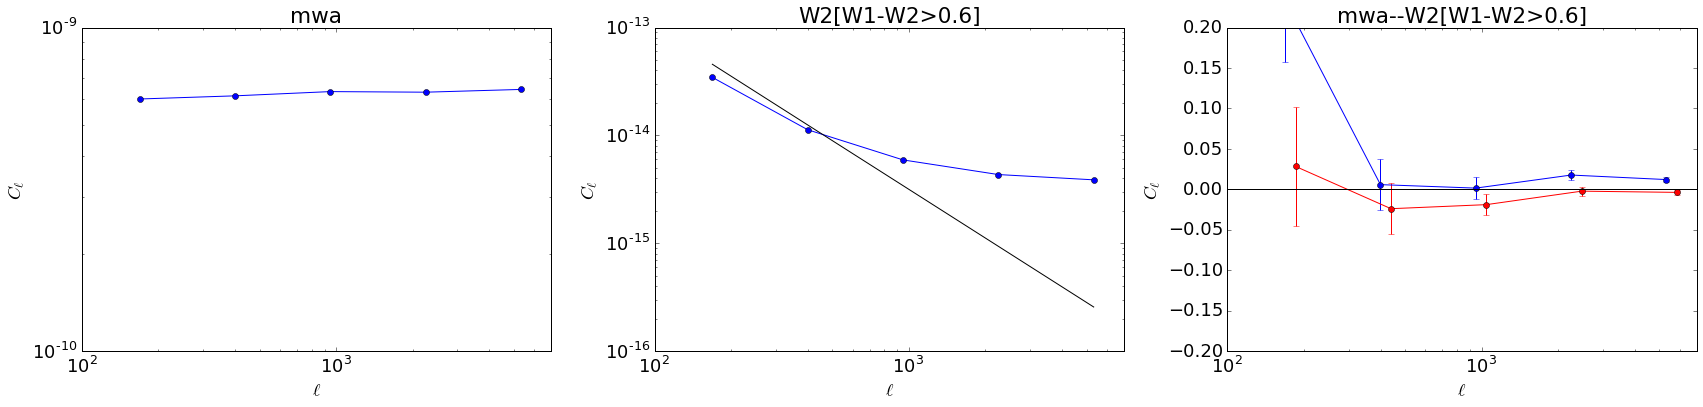

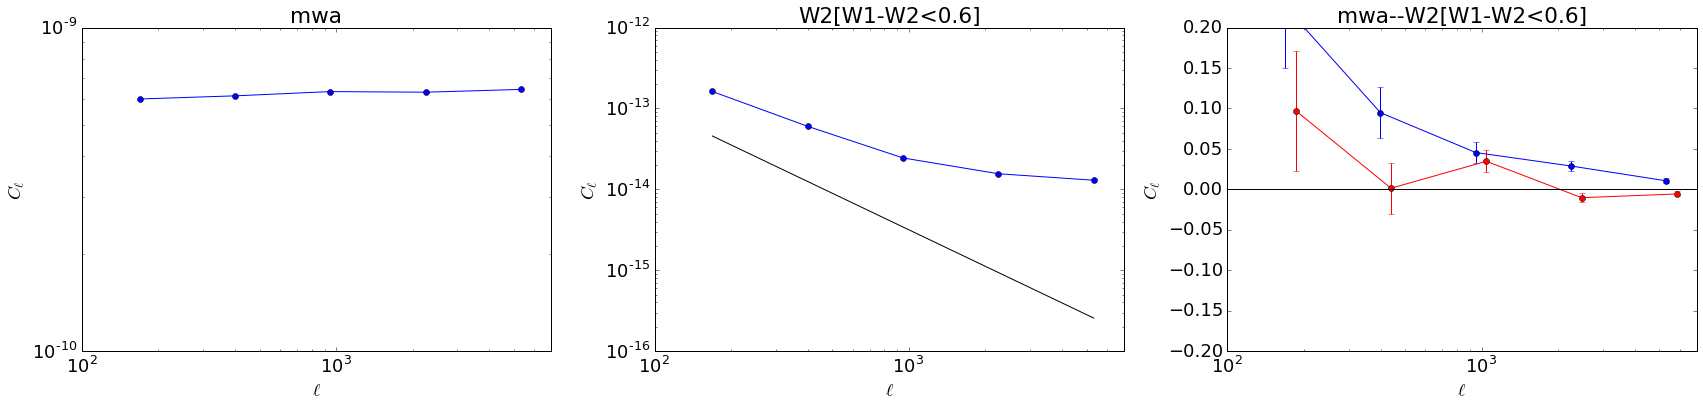

In [102]:
# compare w2_qsoagn and w2_gal

nbins,lmin,lmax = 5,100,7500

imgs_to_cspec_ell(mwa_img,w2_qsoagn_img,dtheta_deg,nbins,lmin,lmax,['mwa','W2[W1-W2>0.6]'],hann=True,ylim=[-.2,.2],xlim=[100,7000])
imgs_to_cspec_ell(mwa_img,w2_gal_img,dtheta_deg,nbins,lmin,lmax,['mwa','W2[W1-W2<0.6]'],hann=True,ylim=[-.2,.2],xlim=[100,7000])

maximum ell is 7622
maximum ell is 7622


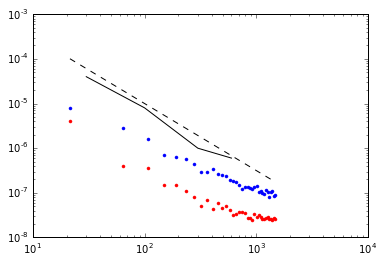

In [54]:
# compare with SDSS angular power spectrun

nbins,lmin,lmax = 35,0,1500

lbins,pspec_qsoagn,pspec2,xspec,bin_counts = cat_utils.calc_xspec(w2_qsoagn_img,w2_qsoagn_img_counts,dtheta_deg,nbins=nbins,lmin=lmin,lmax=lmax,hann=True,uselogbins=False)
lbins,pspec_gal,pspec2,xspec,bin_counts = cat_utils.calc_xspec(w2_gal_img,w2_gal_img_counts,dtheta_deg,nbins=nbins,lmin=lmin,lmax=lmax,hann=True,uselogbins=False)

plt.loglog(lbins,pspec_qsoagn*5000000,'r.')
plt.loglog(lbins,pspec_gal*5000000,'b.')
plt.loglog([30,100,300,600],[4.e-5,8.e-6,1.e-6,6.e-7],'k-')
plt.loglog(lbins,1.e-2*lbins**(-1.5),'k--')